<a href="https://colab.research.google.com/github/Gloria-L19/Sales_prediction/blob/main/Salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
sales_info='/content/sales_predictions.csv'
df= pd.read_csv(sales_info)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [4]:
#Counting duplicates
df.duplicated().sum()

0

No duplicates

In [5]:
#number of rows and columns
df.shape


(8523, 12)

In [6]:
# general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#checking  for the missing values
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Filing the Item_Weight Column with the average weight
average_item_weight= df['Item_Weight'].mean()
df['Item_Weight'].fillna(average_item_weight, inplace=True)


I chose to use mean to replace the missing data in 'Item Weight' because the data was of float datatype

In [9]:
#finding unique values in Item_Fat_Content
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
#replacing low fat with Low fat
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
#replacing LF with Low Fat
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
#replacing 'reg' with Regular
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Low Fat')

In [11]:
# mode for Outlet_Size
mode_Outlet_Size=df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(mode_Outlet_Size,inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

I chose to use mode to find the most occurring value because the data was categorical.

In [12]:
#Summary of the numerical data
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [13]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

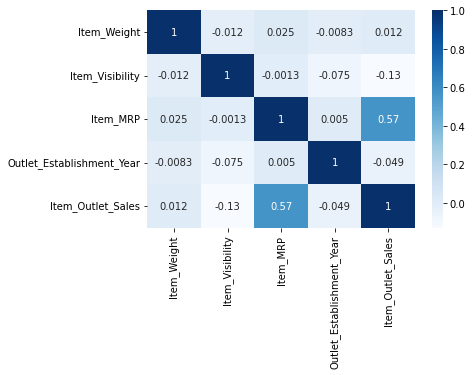

In [14]:
# finding correlation between the data
corr=df.corr()
sns.heatmap(corr,cmap='Blues',annot=True);

from the above there is a medium correlation between Item_MRP and Item_Outlet_sales

Text(0, 0.5, 'outlet_sales')

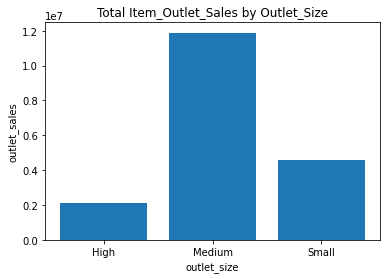

In [15]:
#grouping by Outlet_Size
group_outlet_size= df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
#plotting the bar graph
plt.bar(x=group_outlet_size.index, height=group_outlet_size.values)
#putting the title and labelling axes
plt.title('Total Item_Outlet_Sales by Outlet_Size')
plt.xlabel('outlet_size')
plt.ylabel('outlet_sales')

From the bar graph above, the medium sized outlets had the most sales

In [16]:
#Finding unique values in Outlet_Establishment_Year
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Text(0, 0.5, 'outlet_sales')

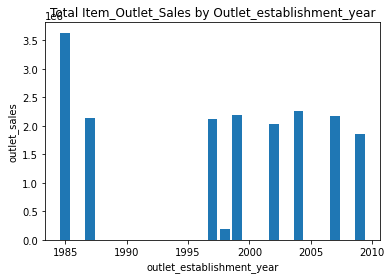

In [17]:
#grouping by year by outlet_establishment_Year
group_outlet_est_year= df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
#plotting the bar graph
plt.bar(x=group_outlet_est_year.index, height=group_outlet_est_year.values)
#putting the title and labelling axes
plt.title('Total Item_Outlet_Sales by Outlet_establishment_year')
plt.xlabel('outlet_establishment_year')
plt.ylabel('outlet_sales')

The most sales were seen in 1985. The sales reduced with time with the lowest beeing seen in 1998. The total item_outlet_sales increased after that.



Text(0, 0.5, 'Frequency of the Item_Weight')

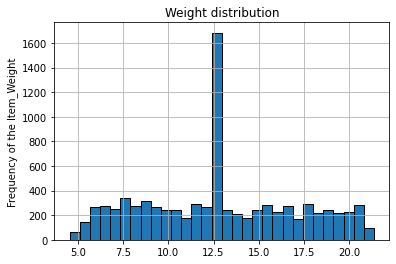

In [18]:
# finding out the distribution of the weight of the items
df['Item_Weight'].hist(bins=30,edgecolor='black');
# adding title
plt.title('Weight distribution')
plt.ylabel('Frequency of the Item_Weight')



From the histogram above, the most ocurring weight is about 13

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

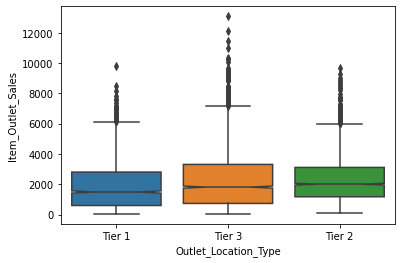

In [19]:
# box plot to compare the Item_Outlet_Sales  to the different outle types
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df,notch=True)


There are very many outlier values affecting the distribution of sales.
Teir 1 has median of 1500 in sales, teir 2 has median of  sales with 2000 in sales and teir 3 with 1900 in sales.
When you look at the ranges and interquartile ranges, Teir 1 and Teir 2 have lower values than Teir 3.
All the locations are skewed positvely
All the locations have multple outliers with  teir 3 having the highest. Overall teir 3 has the most sales because of its spread and the concentration of outliers

In [20]:
# preparing data for machine learning
#Importing librabries
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
#classifying if the column is numerical, ordinal or nominal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Identifier is nominal, 
Item_Weight is numerical,
Item_Fat_Content is ordinal,
Item_Visibility is numerical,
Item_Type is nominal,
Item_MRP is numerical,
Outlet_Identifier is nominal,
Outlet_Establishment_Year is numerical,
Outlet_Size is ordinal,
Outlet_Location_type is ordinal,
Outlet_Type is ordinal
Item_Outlet_Sales is numerical
 
 No missing values

In [27]:
#Finding unique values in 'Outlet_Location_Type'
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [29]:
# ordinal encoding 'Outlet_Location_type'
outlet_location_type_dictionary ={'Tier 1': 0,'Tier 2':1,'Tier 3':2}
df['Outlet_Location_Type'].replace(outlet_location_type_dictionary, inplace=True)
df['Outlet_Location_Type']

0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 8523, dtype: int64

In [30]:
# Identifying unique values in 'Outlet_Size'
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [32]:
# ordinal encoding Outlet_Size
Outlet_Size_dictionary={'Small':0,'Medium':1,'High':1}
df['Outlet_Size'].replace(Outlet_Size_dictionary,inplace=True)
df['Outlet_Size']

0       1
1       1
2       1
3       1
4       1
       ..
8518    1
8519    1
8520    0
8521    1
8522    0
Name: Outlet_Size, Length: 8523, dtype: int64

In [33]:
#Finding unique values in 'Item_Fat_Content'
df['Item_Fat_Content'].value_counts()

Low Fat    5634
Regular    2889
Name: Item_Fat_Content, dtype: int64

In [34]:
#Ordinal encoding 'Item_Fat_Content'
Item_Fat_Content_dictionary={'Low Fat':0,'Regular':1}
df['Item_Fat_Content'].replace(Item_Fat_Content_dictionary,inplace=True)
df['Item_Fat_Content']

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: int64

In [35]:
# unique values in column'Outlet_Type'
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [36]:
# ordinal encoding Outlet_Type
Outlet_Type_dictionary={'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}
df['Outlet_Type'].replace(Outlet_Type_dictionary,inplace=True)
df['Outlet_Type']

0       1
1       2
2       1
3       0
4       1
       ..
8518    1
8519    1
8520    1
8521    2
8522    1
Name: Outlet_Type, Length: 8523, dtype: int64

In [37]:

# defining the feature and target
#target
y=df['Item_Outlet_Sales']
#feature. Dropping Item_Identifier and Outlet_Identifier Coulmns because it will not be necessary in analysis
X= df.drop(columns=['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'])
# performing the train test split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [23]:
#Instantiating column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector( dtype_include='object')

In [24]:
#instantiating transformer
#Scaler
scaler= StandardScaler()
#One_hot_encoder
ohe= OneHotEncoder( handle_unknown='ignore', sparse=False)

In [39]:
#instantiating pipelines for numerical and categorical data
#numerical
num_pipe= make_pipeline(scaler)
num_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [40]:
#for categorical
cat_pipe= make_pipeline( ohe)
cat_pipe


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [41]:
#Instantiate column transformers
#Tuples for column tranformers
number_tuple=(num_pipe,num_selector)
categorical_tuple=(cat_pipe, cat_selector)
#Column Transformer
preprocessor= make_column_transformer(number_tuple, categorical_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3f2481c940>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3f2481c850>)])

In [42]:
# fitting data on the train set
preprocessor.fit(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3f2481c940>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3f2481c850>)])

In [43]:
#transforming the train and test data
X_train_processed= preprocessor.transform(X_train)
X_test_processed= preprocessor.transform(X_test)

In [44]:
# inspecting our final results
print(np.isnan(X_train_processed).sum().sum(),'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(),'missing values in testing data')
print('\n')
#displaying the data as a numpy array
X_train_processed

0 missing values in training data
0 missing values in testing data




array([[ 0.81916441, -0.71842121, -0.71277507, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55825754,  1.39194109, -1.29105225, ...,  1.        ,
         0.        ,  0.        ],
       [-0.12958785,  1.39194109,  1.81331864, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11564949, -0.71842121, -0.92052713, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.76791667, -0.71842121, -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81916441, -0.71842121, -0.95867683, ...,  0.        ,
         0.        ,  0.        ]])